# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


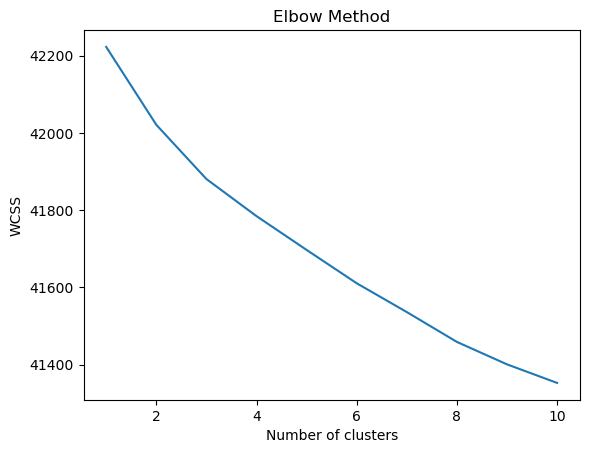

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(people['text'])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Meaningful Cluster Count can be 5 as WCSS shows a slower rate of decrease after 5 clusters.

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(tfidf_matrix)

people['cluster_label'] = kmeans.labels_

print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

cluster_labels = sorted(people['cluster_label'].unique())
for label in cluster_labels:
    cluster_data = people[people['cluster_label'] == label]
    print("\nCluster {}:".format(label))
    print(cluster_data['name'].head())


Based on the terms per cluster:

1. **Cluster 0 - Music**: This cluster seems to represent individuals associated with music, including musicians, and bands.

2. **Cluster 1 - Football**: This cluster appears to contain individuals related to football.

3. **Cluster 2 - Artists**: Individuals in this cluster seem to be related to research, and art
   
4. **Cluster 3 - Politics**: This cluster contains individuals involved in politics.

5. **Cluster 4 - Filmmakers**: This cluster seems to represent individuals from the entertainment industry, including actors, directors, and filmmakers.
    cluster. However, further analysis and domain knowledge may be required to refine these labels. Let me know if you need further assistance!

Group:
- Chandana Anugu
- Sai Sindhu Beeravolu
- Sudheer Puppala
- Srilakshmi Pyarsani